In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [56]:
data = pd.read_csv("Fake News Detection.csv")

In [57]:
df = pd.DataFrame(data)

Here 1-'real' 0-'fake'

In [58]:
df.head(20)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\r\nOn Sunday morn...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\r\n% of reade...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [59]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [60]:
df2 = df.dropna()

In [61]:
df1 = df2.drop(columns = ['URLs','Headline'])

In [62]:
X = df1.iloc[:,0]
y = df1.iloc[:,1]

In [63]:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75, random_state = 1 )

In [64]:
vectorizer = CountVectorizer(stop_words = 'english', max_df = 0.5)

In [65]:
tfidf_transformer = TfidfTransformer()

In [66]:
X_vectorized = vectorizer.fit_transform(X)

In [67]:
X_tfidf_transformer = tfidf_transformer.fit_transform(X_vectorized)

In [68]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [69]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vectorized)
X_test_tfidf = tfidf_transformer.transform(X_test_vectorized)

In [70]:
nb = MultinomialNB()

In [71]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [72]:
y_pred_cv = cross_val_predict(nb, X_tfidf_transformer, y, cv = 6)

In [73]:
cm_cv = confusion_matrix(y,y_pred_cv)

In [74]:
cm_cv

array([[1971,  149],
       [  57, 1811]], dtype=int64)

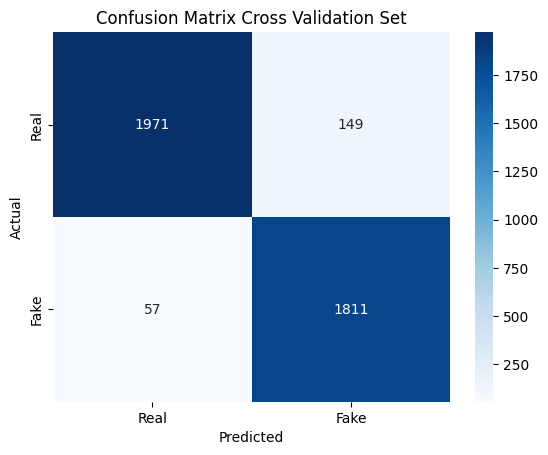

In [51]:
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Cross Validation Set')
plt.show()


In [75]:
y_pred = nb.predict(X_test_tfidf)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 0)
recall = recall_score(y_test, y_pred, pos_label = 0)
f1 = f1_score(y_test, y_pred, pos_label = 0)
report = classification_report(y_test, y_pred)

In [77]:
accuracy

0.9398194583751254

In [78]:
precision

0.954

In [79]:
recall

0.9280155642023347

In [80]:
f1

0.9408284023668638

In [81]:
report

'              precision    recall  f1-score   support\n\n           0       0.95      0.93      0.94       514\n           1       0.93      0.95      0.94       483\n\n    accuracy                           0.94       997\n   macro avg       0.94      0.94      0.94       997\nweighted avg       0.94      0.94      0.94       997\n'

In [82]:
cm = confusion_matrix(y_test, y_pred)

In [83]:
cm

array([[477,  37],
       [ 23, 460]], dtype=int64)

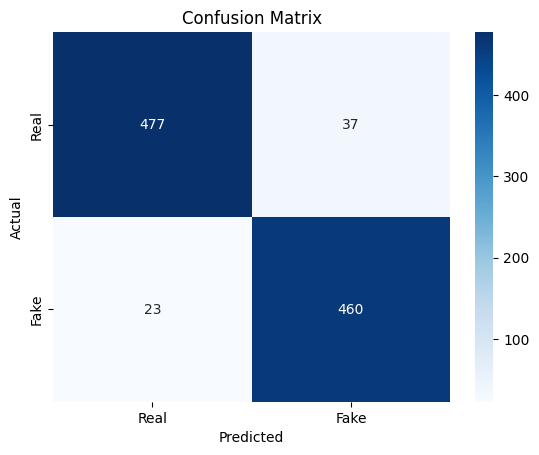

In [84]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
